In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [2]:
PA = 'PA'
PB = 'PB'
BINOMIAL = 'CL-B'

In [3]:
def modificar_valor_InterfModel(item):
    tmp = item.strip()
    nro = int(tmp[-1:])
    return nro

def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    simulacao = nome_diretorio[posicao:]
    if simulacao == '0.7':
            simulacao = BINOMIAL
    return simulacao

In [4]:
colorMAP = {
    'PA' : '#d62d20',
    'PB' : '#80b0ff',
    '0.1' : '#1A66FF',
    '0.2' : '#1A66FF',
    '0.3' : '#1A66FF',
    '0.4' : '#1A66FF',
    '0.5' : '#1A66FF',
    '0.6' : '#1A66FF',
    '0.7' : '#1A66FF',
    '0.8' : '#1A66FF',
    '0.9' : '#1A66FF',
    'CL-B' : '#FF7F0E'
}

In [5]:
FILE = 'energy_NJ_per_bit.txt' # arquivo de interesse
colunas = [
    'Modelo de colisao',
    'nó 1',
    'nó 2',
    'nó 3',
    'nó 4',
    'nó 5'
]

# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()
folders.sort()

# concentrar todos os dados aqui
DATA = pd.DataFrame()

for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['Modelo de colisao'] = dfPRR['Modelo de colisao'].apply(modificar_valor_InterfModel)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')
    
DATA = DATA[DATA['Modelo de colisao'] != 2]
#del dfPRR

coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_0.9


In [6]:
DATA.head(10)

,Modelo de colisao,nó 1,nó 2,nó 3,nó 4,nó 5,simulacao
0,0,102.752,103.044,67.357,46.057,47.027,PA
1,1,108.034,108.545,70.316,52.628,54.479,PA
3,0,107.721,106.148,84.643,47.680,62.219,PB
4,1,134.739,133.308,116.419,67.170,113.731,PB
6,0,106.389,100.907,71.766,55.054,58.262,0.1
7,1,119.949,113.639,103.727,88.507,116.718,0.1
9,0,104.050,100.440,69.504,53.352,56.163,0.2
10,1,113.428,109.620,89.530,79.307,97.886,0.2
12,0,102.255,100.128,68.085,51.788,54.272,0.3
13,1,109.023,106.922,80.181,72.451,85.649,0.3


In [7]:
exportar_arquivo = path.join('dados_csv','nano-joule-bit.csv')
DATA.to_csv(exportar_arquivo,
            sep="|"
           )

In [8]:
dfData = DATA.melt(id_vars=['Modelo de colisao', 'simulacao'],
          value_vars=['nó 1', 'nó 2', 'nó 3', 'nó 4', 'nó 5'],
          var_name='nos',
          value_name = 'NJ Bit'
         )

In [9]:
dfData.head(5)

,Modelo de colisao,simulacao,nos,NJ Bit
0,0,PA,nó 1,102.752
1,1,PA,nó 1,108.034
2,0,PB,nó 1,107.721
3,1,PB,nó 1,134.739
4,0,0.1,nó 1,106.389


In [10]:
exportar_arquivo = path.join('dados_csv','nano-joule-bit-transposto.csv')
dfData.to_csv(exportar_arquivo,
            sep="|"
           )

In [11]:
# select = (dfData['Modelo de colisao'] != 2)


# df = dfData
# g = sns.factorplot(x="node", y="NJ Bit", col="Modelo de colisao", hue="simulacao", 
#                    data=df,
#                    kind='point',
#                    col_wrap=2,
#                    join=True,
#                    sharey=False,
#                    palette="tab10",
#                    markers='.',
#                    size=5,
#                    aspect=2.5)
# g.set(ylim=(0,150))

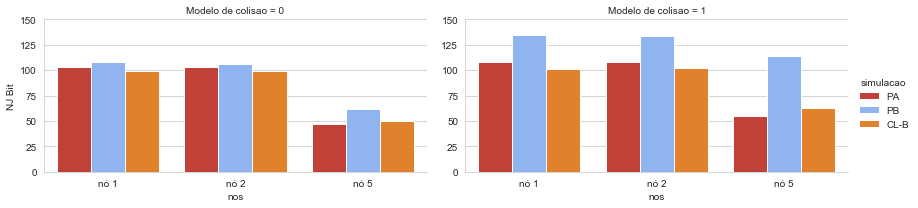

In [12]:
selectA = (dfData['simulacao'] == PA) | (dfData['simulacao'] == PB) | (dfData['simulacao'] == BINOMIAL)
selectB = (dfData['nos'] == 'nó 1') | (dfData['nos'] == 'nó 2') | (dfData['nos'] == 'nó 5')
df = dfData[selectA & selectB]
# df = dfData[selectB]

grid = sns.catplot(x="nos", y="NJ Bit", col="Modelo de colisao", hue="simulacao", 
                   data=df,
                   kind='bar',
                   palette=colorMAP,
                   sharey=False,
                   height=3,
                   aspect=2)
grid.set(ylim=(0,150))


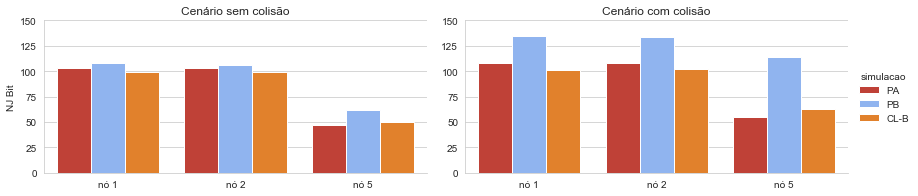

In [13]:
axes = grid.axes.flatten()

axes[0].set_title("Cenário sem colisão")
axes[1].set_title("Cenário com colisão")

axes[0].set_xlabel('')
axes[1].set_xlabel('')

axes[0].get_figure()

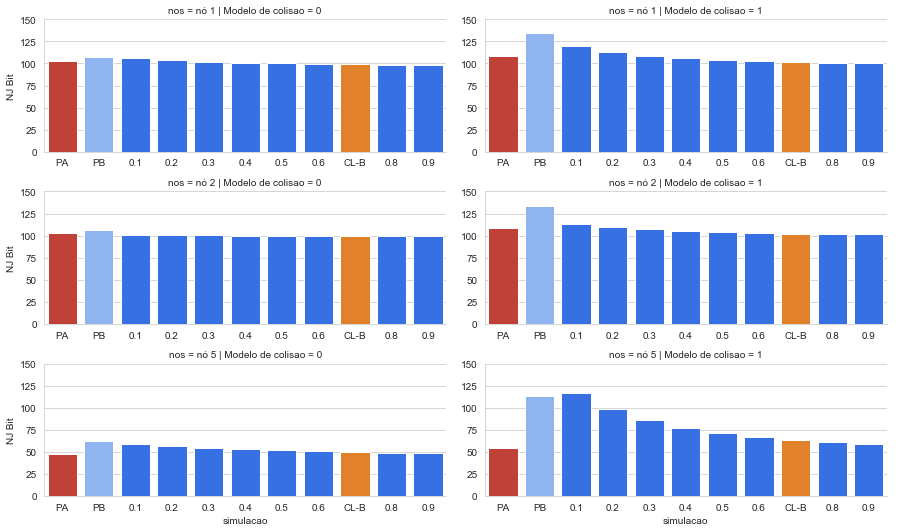

In [14]:

select = (dfData['nos'] == 'nó 1') | (dfData['nos'] == 'nó 2') | (dfData['nos'] == 'nó 5')
df = dfData[select]

g = sns.catplot(x="simulacao", y="NJ Bit", col="Modelo de colisao", row="nos", 
                   data=df,
                   kind='bar',
                   palette=colorMAP,
                   sharex=False,
                   sharey=False,
                   height=2.5,
                   aspect=2.5)
g.set(ylim=(0,150))
g.add_legend()

Text(0.5, 1.0, 'Cenário sem colisão')

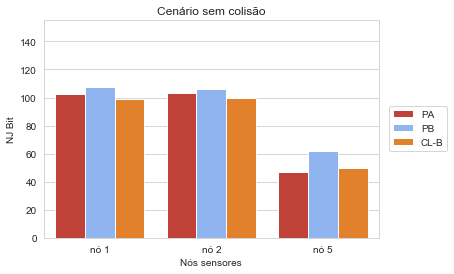

In [15]:
selectA = (dfData['simulacao'] == PA) | (dfData['simulacao'] == PB) | (dfData['simulacao'] == BINOMIAL)
selectB = (dfData['nos'] == 'nó 1') | (dfData['nos'] == 'nó 2') | (dfData['nos'] == 'nó 5')
selectC = (dfData['Modelo de colisao'] == 0)
df = dfData[selectA & selectB & selectC]

axes = sns.barplot(x='nos',
                   y='NJ Bit',
                   hue='simulacao',
                   data=df,
                   palette=colorMAP
                  )
axes.legend(loc=(1.03,0.4))
axes.set(ylim=(0,155))
axes.set_xlabel('Nós sensores')

plt.title('Cenário sem colisão')

Text(0.5, 1.0, 'Cenário com colisão')

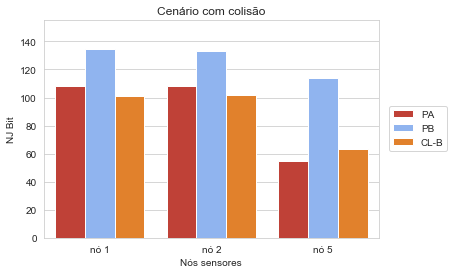

In [16]:
selectA = (dfData['simulacao'] == PA) | (dfData['simulacao'] == PB) | (dfData['simulacao'] == BINOMIAL)
selectB = (dfData['nos'] == 'nó 1') | (dfData['nos'] == 'nó 2') | (dfData['nos'] == 'nó 5')
selectC = (dfData['Modelo de colisao'] == 1)
df = dfData[selectA & selectB & selectC]

axes = sns.barplot(x='nos',
                   y='NJ Bit',
                   hue='simulacao',
                   data=df,
                   palette=colorMAP
                  )
axes.legend(loc=(1.03,0.4))
axes.set(ylim=(0,155))
axes.set_xlabel('Nós sensores')

plt.title('Cenário com colisão')